In [2]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
img = image.load_img('one.jpg',target_size=(512,512))

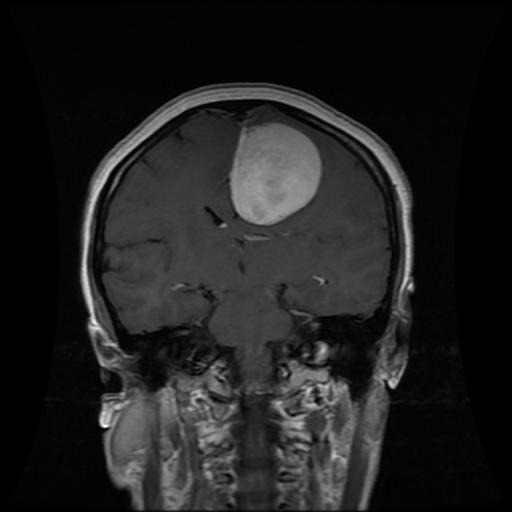

In [18]:
img

In [19]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [34]:
datagen = ImageDataGenerator(
    rotation_range=5,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

In [22]:
img= image.img_to_array(img)

In [23]:
type(img)

numpy.ndarray

In [24]:
img.shape


(512, 512, 3)

In [25]:
input_batch=img.reshape((1, ) + img.shape)

In [26]:
input_batch.shape

(1, 512, 512, 3)

In [35]:
i=0
for output in datagen.flow(input_batch,batch_size=1,save_to_dir='aug'):
    i = i+1
    
    if i == 15:
        break
        

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show
import numpy as np
import os
from PIL import Image
from skimage import io
from skimage.color import gray2rgb

In [4]:
datagen = ImageDataGenerator(
    rotation_range=2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

In [13]:
image_directory = '1/'
SIZE = 512
dataset = []

In [14]:
my_images = os.listdir(image_directory)

In [15]:
for image_name in my_images:
    if image_name.lower().endswith('.jpg'):  # Check file format
        image_path = os.path.join(image_directory, image_name)

        # Read image
        image = io.imread(image_path)

        # Ensure image is in RGB format
        if len(image.shape) == 2:  # Grayscale
            image = gray2rgb(image)  # Convert to RGB
        elif image.shape[-1] == 4:  # RGBA (has an alpha channel)
            image = image[:, :, :3]  # Remove alpha channel

        # Convert to PIL image and resize
        image = Image.fromarray(image)  # No need to specify mode, already RGB
        image = image.resize((SIZE, SIZE))

        dataset.append(np.array(image))

dataset = np.array(dataset)
print("Dataset shape:", dataset.shape) 

Dataset shape: (73, 512, 512, 3)


In [16]:
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=50,
                          save_to_dir='miningoma',
                          save_prefix='aug',
                          save_format='jpg'):
    i+=1
    if i > 10: #Epochs
        break